In [15]:
# Import Neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import precision_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression

#import warning libraries
import warnings

warnings.filterwarnings('ignore')

In [3]:
#load dataset for training :
df = pd.read_csv('../Datasets/diabetes_num.csv')
df.head()

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

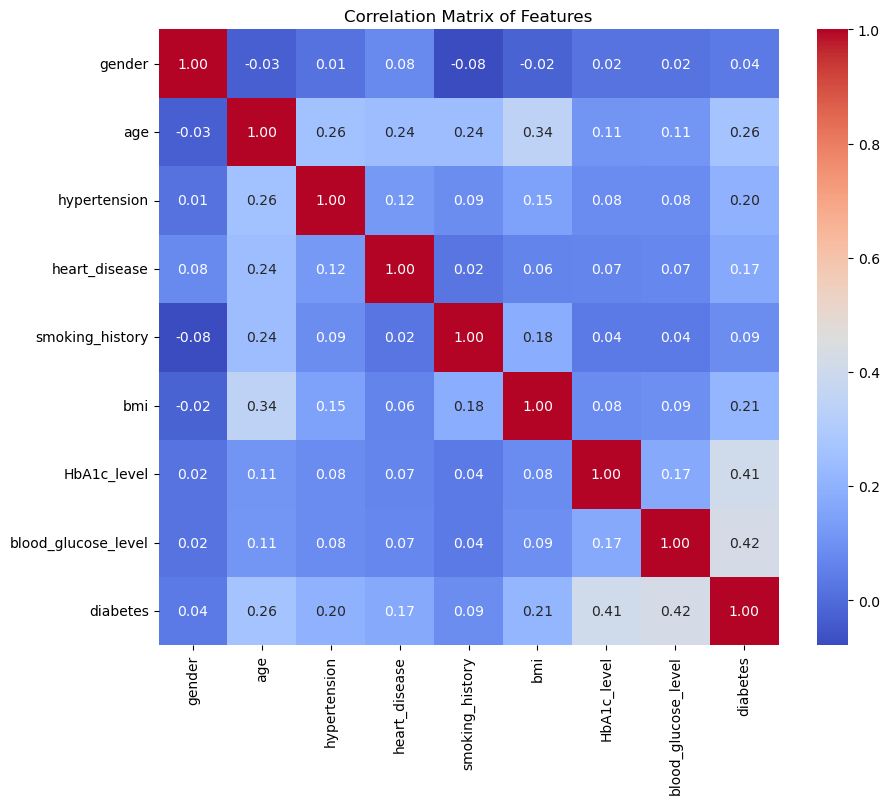

In [17]:
correlation_matrix = df.corr()

# Display correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [21]:
X = df.drop(['diabetes','gender','smoking_history'], axis=1)

y = df['diabetes']

print(f"features shape : {X.shape}")
print(f"output shape : {y.shape}")

features shape : (96146, 6)
output shape : (96146,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [25]:
lr=LogisticRegression(max_iter=3000)

lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [31]:
y_predection=lr.predict(X_test)
print( f"LogisticRegression Classification Report : {classification_report(y_test, y_predection)}")

LogisticRegression Classification Report :               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [33]:
print("Training Score:",lr.score(X_train,y_train)*100,'%')
print("Testing Score:",lr.score(X_test,y_test)*100,'%')

Training Score: 95.90982370378075 %
Testing Score: 95.69942797711909 %


In [35]:
import joblib
joblib.dump(lr,"LogisticRegression.pkl")

['LogisticRegression.pkl']